In [690]:
import os
import numpy as np
import pandas as pd
import sqlite3
from sklearn import preprocessing

In [705]:
import json
import requests
with open('.secrets/darksky_apikey.json') as f:
    params = json.load(f)
# Load secrets from credentials.json
APIKEY = params['API_Key']
lat = 52.5200
long = 13.4050

url = f'https://api.darksky.net/forecast/{APIKEY}/{lat},{long}, 1315526400?exclude=currently,flags'

response = requests.get(url=url)
data = json.loads(response.text)

print(len(data))
print(data.keys())
data
# weather_data = pd.DataFrame('data')

2
dict_keys(['code', 'error'])


{'code': 403, 'error': 'daily usage limit exceeded'}

In [692]:
data['daily']['data'][0]['icon']

KeyError: 'daily'

In [325]:
season2011.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 204 to 14698
Data columns (total 20 columns):
Match_ID                  1224 non-null int64
Unique_Team_ID            1224 non-null int64
Unique_Team               1224 non-null object
Div                       1224 non-null object
Season                    1224 non-null object
Date                      1224 non-null object
HomeTeam                  1224 non-null object
AwayTeam                  1224 non-null object
FTHG                      1224 non-null int64
FTAG                      1224 non-null int64
FTR                       1224 non-null object
KaderHome                 1224 non-null object
AvgAgeHome                1224 non-null object
ForeignPlayersHome        1224 non-null object
OverallMarketValueHome    1224 non-null object
AvgMarketValueHome        1224 non-null object
StadiumCapacity           1224 non-null object
count_goal                1224 non-null int64
WinnerInMatch             884 non-null object
Los

In [473]:
season2011['New_date'] = season2011['Date'].apply(pd.Timestamp)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [474]:
season2011['New_date'] = pd.DatetimeIndex(season2011['New_date']).astype(np.int64)/10**9

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [702]:
times = season2011_df.New_date.astype(int)
print(len(times))
times.head()

306


204    1312675200
205    1313193600
206    1313798400
207    1314403200
208    1315612800
Name: New_date, dtype: int64

In [ ]:
f'https://api.darksky.net/forecast/{APIKEY}/{lat},{long}, 1315526400?exclude=currently,flags'

In [703]:
def get_rain(times):
    

    with open('.secrets/darksky_apikey.json') as f:
        params = json.load(f)
    # Load secrets from credentials.json
    APIKEY = params['API_Key']
    lat = 52.5200
    long = 13.4050
    
    output = []
    for time in times:
        url = f'https://api.darksky.net/forecast/{APIKEY}/{lat},{long},{time}?exclude=currently,flags'

        dict_keys = ['icon', 'time']
        response = requests.get(url=url)
        data = json.loads(response.text)['daily']['data'][0]
        
        data = {k : data[k] for k in dict_keys}
        output.append(data)

    return output

In [704]:
# weather_df = 
pd.DataFrame(get_rain(times))

KeyError: 'daily'

In [706]:
print(data.keys())
data['daily']['data'][0]

dict_keys(['code', 'error'])


KeyError: 'daily'

In [13]:
connection = sqlite3.connect("database.sqlite")
c = connection.cursor()
bundesliga = pd.read_sql_query("SELECT * FROM FlatView_Advanced", connection)

# c.close()
# connection.close()

In [ ]:
bundesliga11 = pd.read_sql_query("SELECT * FROM table", connection)
bundesliga11  

In [14]:
c.execute("""
            SELECT *
            FROM Matches

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [15]:
c.execute("""
            SELECT *
            FROM sqlite_sequence

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,name,seq
0,Matches,46774
1,Unique_Teams,128


In [18]:
c.execute("""
            SELECT *
            FROM Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [19]:
c.execute("""
            SELECT *
            FROM Teams_in_Matches
            
                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()


49148


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [20]:
c.execute("""
            SELECT *
            FROM Unique_Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [21]:
c.execute("""
            SELECT distinct TeamName
            FROM Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]

print(len(df))
df.head()

57


,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,RB Leipzig
4,Schalke 04


In [51]:
# q1 The Name of the Team in Germany
c.execute("""
            SELECT distinct TeamName
            FROM Unique_Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()

128


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [63]:
## joining tables
c.execute("""
            SELECT *
            FROM Matches m
            JOIN Teams_in_Matches USING(Match_ID)
            JOIN Unique_Teams USING(Unique_Team_ID)
            JOIN Teams Using(TeamName)
            
                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()

301275


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Unique_Team_ID,TeamName,Season,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2005,32,25,14,23230000,726000,49780
1,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2006,32,23,16,24650000,770000,47728
2,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2007,32,23,16,21180000,662000,47728
3,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2008,33,23,12,18750000,568000,47728
4,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2009,32,23,13,23900000,747000,47728


In [24]:
bundesliga

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000
5,5377,1,Bayern Munich,D1,2005,2005-09-20,Ein Frankfurt,Bayern Munich,0,1,A,25,27,14,171500000,6860000,75000
6,5383,1,Bayern Munich,D1,2005,2005-09-24,Hamburg,Bayern Munich,2,0,H,25,27,14,171500000,6860000,75000
7,5763,1,Bayern Munich,D1,2005,2005-10-01,Bayern Munich,Wolfsburg,2,0,H,25,27,14,171500000,6860000,75000
8,5384,1,Bayern Munich,D1,2005,2005-10-15,Schalke 04,Bayern Munich,1,1,D,25,27,14,171500000,6860000,75000
9,5432,1,Bayern Munich,D1,2005,2005-10-22,Bayern Munich,Duisburg,4,0,H,25,27,14,171500000,6860000,75000


# The name of the Team

In [476]:
print(bundesliga.Unique_Team.nunique())
bundesliga.Unique_Team.unique()

57


array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig',
       'Schalke 04', "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim',
       'Hertha', 'Mainz', 'Hamburg', 'Werder Bremen', 'Ein Frankfurt',
       'Augsburg', 'Freiburg', 'Stuttgart', 'Hannover', 'Ingolstadt',
       'Darmstadt', 'Paderborn', 'Nurnberg', 'Braunschweig',
       'Greuther Furth', 'Fortuna Dusseldorf', 'Kaiserslautern',
       'St Pauli', 'Bochum', 'Karlsruhe', 'Bielefeld', 'Cottbus',
       'Duisburg', 'Hansa Rostock', 'Aachen', 'Union Berlin',
       'Heidenheim', 'Dresden', 'Sandhausen', 'Erzgebirge Aue', 'Kiel',
       'Regensburg', 'Munich 1860', 'Wurzburger Kickers', 'Frankfurt FSV',
       'Aalen', 'Oberhausen', 'Osnabruck', 'Koblenz', 'Ahlen', 'Wehen',
       'CZ Jena', 'Offenbach', 'Burghausen', 'Unterhaching',
       'Saarbrucken', 'Siegen', 'RW Essen'], dtype=object)

In [26]:
def get_goals(record):
    """return the FTHG of the unique team if the team played at home.
        Otherwise return FTAG"""
    if record['Unique_Team'] == record['HomeTeam']:
        return record['FTHG']
    else:
        return record['FTAG']

In [239]:
bundesliga['count_goal'] = bundesliga.apply(get_goals, axis=1)
bundesliga.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000,3
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000,5
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000,3
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000,2
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000,1


In [432]:
# filtering season 2011 & Division D1 
season2011 = bundesliga.loc[(bundesliga['Season'] == "2011") & (bundesliga['Div'] == "D1")]
season2011.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,A,24,25,11,335600000,13980000,75000,0
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,24,25,11,335600000,13980000,75000,1
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H,24,25,11,335600000,13980000,75000,5
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,24,25,11,335600000,13980000,75000,3
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H,24,25,11,335600000,13980000,75000,7


In [541]:
season2011.shape

(612, 21)

In [545]:
#drop duplicate by Match_ID
season2011_df = season2011.drop_duplicates(subset='Match_ID', keep="first")

In [546]:
season2011_df.shape

(306, 21)

In [551]:
season2011_df.groupby('Unique_Team').sum().head()

,Match_ID,Unique_Team_ID,FTHG,FTAG,count_goal,New_date
Unique_Team,,,,,,
Augsburg,14534,150,12,11,9,1.322741e+10
Bayern Munich,41598,34,65,34,77,4.505337e+10
Dortmund,39658,64,56,47,78,4.239726e+10
FC Koln,28133,176,45,21,31,2.916000e+10
Freiburg,10055,128,12,8,9,1.061018e+10


In [552]:
print(season2011_df.Unique_Team.nunique())
season2011_df.Unique_Team.unique()

17


array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'Schalke 04',
       "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim', 'Hertha',
       'Mainz', 'Hamburg', 'Werder Bremen', 'Augsburg', 'Freiburg',
       'Stuttgart', 'Hannover', 'Nurnberg'], dtype=object)

# The toal number of goals scored by the team during the 2011 season

In [553]:
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,WinnerInMatch,LoserInMatch,New_date
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,24,25,11,335600000,13980000,75000,0,M'gladbach,Bayern Munich,1.312675e+09
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,24,25,11,335600000,13980000,75000,1,Bayern Munich,Wolfsburg,1.313194e+09
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,24,25,11,335600000,13980000,75000,5,Bayern Munich,Hamburg,1.313798e+09
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Kaiserslautern,1.314403e+09
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,24,25,11,335600000,13980000,75000,7,Bayern Munich,Freiburg,1.315613e+09
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,24,25,11,335600000,13980000,75000,2,Bayern Munich,Schalke 04,1.316304e+09
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Leverkusen,1.316822e+09
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,24,25,11,335600000,13980000,75000,0,None,None,1.317427e+09
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,24,25,11,335600000,13980000,75000,4,Bayern Munich,Hertha,1.318637e+09
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,24,25,11,335600000,13980000,75000,1,Hannover,Bayern Munich,1.319328e+09


In [554]:
# sum rows in pandas datafram which match a column value
season2011_df.groupby('Unique_Team')['count_goal'].agg('sum').sort_values(ascending=False) 

Unique_Team
Dortmund         78
Bayern Munich    77
Schalke 04       70
Leverkusen       50
Wolfsburg        38
M'gladbach       37
FC Koln          31
Hoffenheim       27
Mainz            26
Werder Bremen    20
Hertha           17
Hamburg          14
Stuttgart        10
Freiburg          9
Augsburg          9
Hannover          6
Nurnberg          3
Name: count_goal, dtype: int64

# The total number of wins the team earned during

In [437]:
def win_team(record):
    """return the HomeTeam if FTHG > FTAG 
        Otherwise return AwayTeam"""
    if record['FTHG'] > record['FTAG']:
        return record['HomeTeam']
    elif record['FTHG'] < record['FTAG']:
        return record['AwayTeam']


In [555]:
season2011_df['WinnerInMatch'] = season2011_df.apply(win_team, axis=1)
season2011_df

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,WinnerInMatch,LoserInMatch,New_date
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,24,25,11,335600000,13980000,75000,0,M'gladbach,Bayern Munich,1.312675e+09
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,24,25,11,335600000,13980000,75000,1,Bayern Munich,Wolfsburg,1.313194e+09
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,24,25,11,335600000,13980000,75000,5,Bayern Munich,Hamburg,1.313798e+09
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Kaiserslautern,1.314403e+09
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,24,25,11,335600000,13980000,75000,7,Bayern Munich,Freiburg,1.315613e+09
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,24,25,11,335600000,13980000,75000,2,Bayern Munich,Schalke 04,1.316304e+09
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Leverkusen,1.316822e+09
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,24,25,11,335600000,13980000,75000,0,None,None,1.317427e+09
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,24,25,11,335600000,13980000,75000,4,Bayern Munich,Hertha,1.318637e+09
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,24,25,11,335600000,13980000,75000,1,Hannover,Bayern Munich,1.319328e+09


In [565]:
season2011_df.WinnerInMatch.value_counts().head()
winner_2011 = season2011_df.WinnerInMatch.value_counts()
winner_2011.head()

Dortmund         25
Bayern Munich    23
Schalke 04       20
M'gladbach       17
Leverkusen       15
Name: WinnerInMatch, dtype: int64

In [566]:
def loser_team(record):
    """return the HomeTeam if FTAG < 
        Otherwise return FTAG"""
    if record['FTHG'] < record['FTAG']:
        return record['HomeTeam']
    elif record['FTHG'] > record['FTAG']:
        return record['AwayTeam']

In [567]:
season2011_df['LoserInMatch'] = season2011_df.apply(loser_team, axis=1) 

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [590]:
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,WinnerInMatch,LoserInMatch,New_date
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,24,25,11,335600000,13980000,75000,0,M'gladbach,Bayern Munich,1.312675e+09
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,24,25,11,335600000,13980000,75000,1,Bayern Munich,Wolfsburg,1.313194e+09
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,24,25,11,335600000,13980000,75000,5,Bayern Munich,Hamburg,1.313798e+09
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Kaiserslautern,1.314403e+09
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,24,25,11,335600000,13980000,75000,7,Bayern Munich,Freiburg,1.315613e+09
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,24,25,11,335600000,13980000,75000,2,Bayern Munich,Schalke 04,1.316304e+09
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Leverkusen,1.316822e+09
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,24,25,11,335600000,13980000,75000,0,None,None,1.317427e+09
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,24,25,11,335600000,13980000,75000,4,Bayern Munich,Hertha,1.318637e+09
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,24,25,11,335600000,13980000,75000,1,Hannover,Bayern Munich,1.319328e+09


In [615]:
def tied_team(record):
    """return the HomeTeam if FTAG < 
        Otherwise return FTAG"""
    if record['FTHG'] == record['FTAG']:
        return(record['Unique_Team'])

In [616]:
season2011_df['Draw'] = season2011_df.apply(tied_team, axis=1) 

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [617]:
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,WinnerInMatch,LoserInMatch,New_date,Draw
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,25,11,335600000,13980000,75000,0,M'gladbach,Bayern Munich,1.312675e+09,None
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,25,11,335600000,13980000,75000,1,Bayern Munich,Wolfsburg,1.313194e+09,None
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,25,11,335600000,13980000,75000,5,Bayern Munich,Hamburg,1.313798e+09,None
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,25,11,335600000,13980000,75000,3,Bayern Munich,Kaiserslautern,1.314403e+09,None
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,25,11,335600000,13980000,75000,7,Bayern Munich,Freiburg,1.315613e+09,None
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,25,11,335600000,13980000,75000,2,Bayern Munich,Schalke 04,1.316304e+09,None
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,25,11,335600000,13980000,75000,3,Bayern Munich,Leverkusen,1.316822e+09,None
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,25,11,335600000,13980000,75000,0,None,None,1.317427e+09,Bayern Munich
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,25,11,335600000,13980000,75000,4,Bayern Munich,Hertha,1.318637e+09,None
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,25,11,335600000,13980000,75000,1,Hannover,Bayern Munich,1.319328e+09,None


In [662]:
draw2011 = season2011_df.Draw.value_counts() 
draw2011 = draw2011.sort_index()
draw2011

Augsburg         6
Bayern Munich    4
Dortmund         6
FC Koln          6
Freiburg         3
Hamburg          4
Hannover         1
Hertha           6
Hoffenheim       8
Leverkusen       8
M'gladbach       7
Mainz            5
Schalke 04       4
Stuttgart        2
Werder Bremen    5
Wolfsburg        4
Name: Draw, dtype: int64

In [601]:
season2011_df['WinnerInMatch'].isna().head(10)

204    False
205    False
206    False
207    False
208    False
209    False
210    False
211     True
212    False
213    False
Name: WinnerInMatch, dtype: bool

In [569]:
season2011_df.LoserInMatch.value_counts().head()
loser_2011 = season2011_df.LoserInMatch.value_counts()
loser_2011

FC Koln           20
Kaiserslautern    19
Hertha            17
Wolfsburg         16
Nurnberg          16
Hamburg           14
Werder Bremen     14
Freiburg          14
Hoffenheim        13
Mainz             13
Augsburg          12
Stuttgart         11
Hannover          10
Leverkusen        10
Schalke 04        10
M'gladbach         8
Bayern Munich      7
Dortmund           3
Name: LoserInMatch, dtype: int64

# Q4. A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

In [640]:
print("Number of wins:")
print(winner_2011.head())
print('\n')
print("Number of losses:")
print(loser_2011.head())
print('\n')
print("Number of Draw:")
print(draw2011.head())

Number of wins:
Dortmund         25
Bayern Munich    23
Schalke 04       20
M'gladbach       17
Leverkusen       15
Name: WinnerInMatch, dtype: int64


Number of losses:
FC Koln           20
Kaiserslautern    19
Hertha            17
Wolfsburg         16
Nurnberg          16
Name: LoserInMatch, dtype: int64


Number of Draw:
Leverkusen    8
Hoffenheim    8
M'gladbach    7
Dortmund      6
Hertha        6
Name: Draw, dtype: int64


In [255]:
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

# winner_2011.hist(ax=axes[0])

# loser_2011.hist(ax=axes[1])

In [571]:
winner_list = ['WinnerInMatch']
ax = season2011_df[winner_list]['WinnerInMatch'].unique()
ax.tolist()[0:5]

["M'gladbach", 'Bayern Munich', None, 'Hannover', 'Dortmund']

In [572]:
teams = winner_2011.index.sort_values()
teams

Index(['Augsburg', 'Bayern Munich', 'Dortmund', 'FC Koln', 'Freiburg',
       'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Kaiserslautern',
       'Leverkusen', 'M'gladbach', 'Mainz', 'Nurnberg', 'Schalke 04',
       'Stuttgart', 'Werder Bremen', 'Wolfsburg'],
      dtype='object')

In [574]:
winner_2011.sort_index().head(7)

Augsburg          8
Bayern Munich    23
Dortmund         25
FC Koln           8
Freiburg         10
Hamburg           8
Hannover         12
Name: WinnerInMatch, dtype: int64

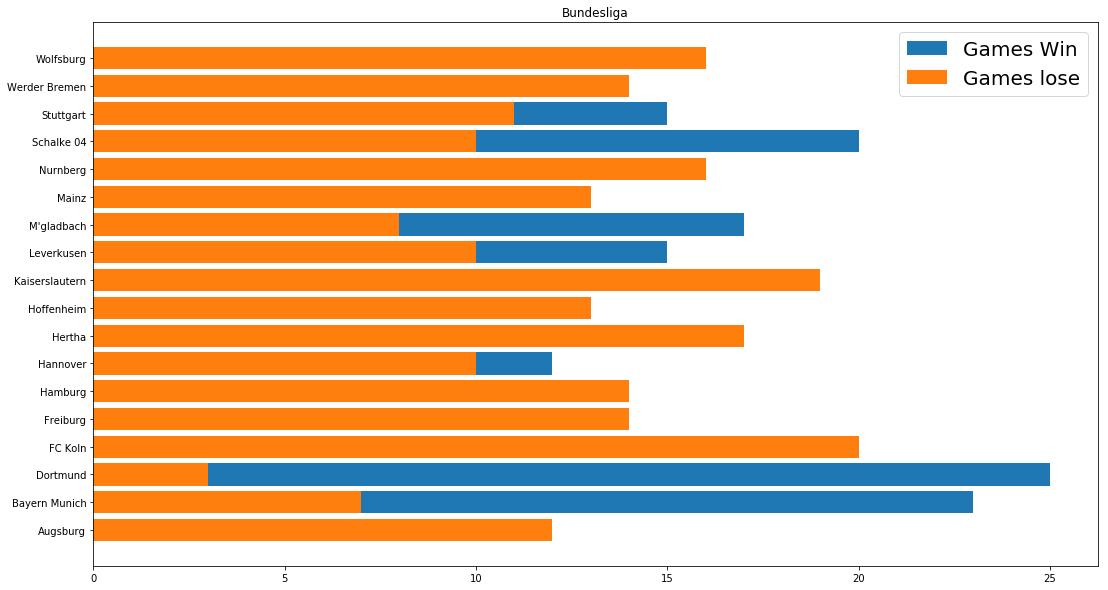

In [575]:
f, ax = plt.subplots(figsize=(18,10))
# plt.xticks(x, )
plt.barh(teams, winner_2011.sort_index(), label='Games Win')
plt.barh(teams, loser_2011.sort_index(), label='Games lose')
ax.set_title("Bundesliga")
ax.legend(fontsize = 20)

Text(0.5, 1.0, 'FC Koln')

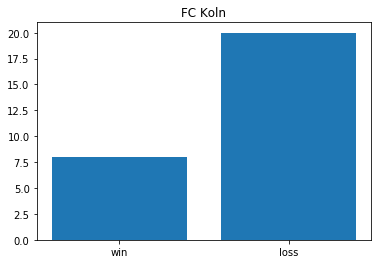

In [576]:
fig, axe = plt.subplots()

team = 'FC Koln'

axe.bar(['win', 'loss'], [winner_2011[team], loser_2011[team]])
axe.set_title(team)

In [ ]:
fig, axe = plt.subplots(nrows=9, ncols=4, figsize=(12,12))

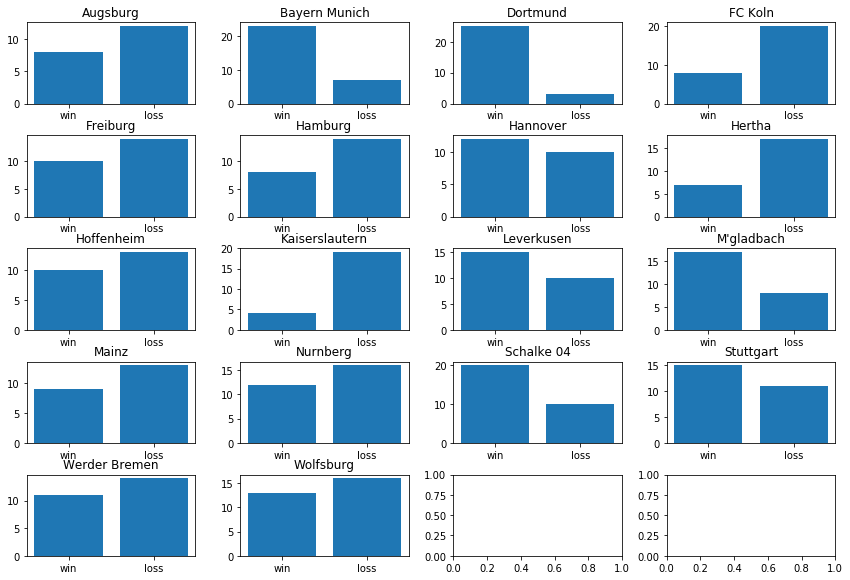

In [577]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12,8))
plt.tight_layout()
axs = axes.flatten()
for i, team in enumerate(teams):
    ax = axs[i]
    ax.set_title(team)
    a = ax.bar(['win', 'loss'], [winner_2011[team], loser_2011[team]])


Text(0.5, 1.0, 'losses')

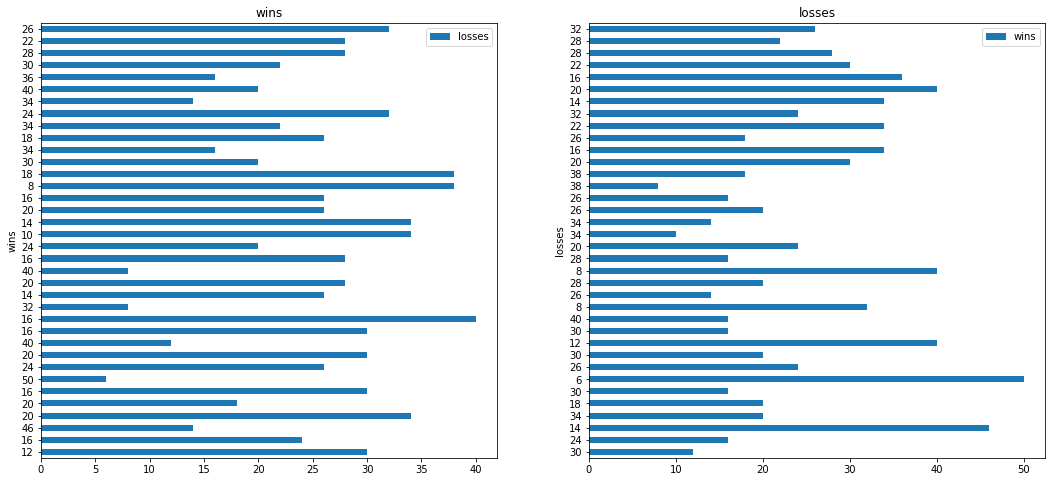

In [465]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

df.set_index('wins').plot(kind='barh', ax=axes[0])
axes[0].set_title('wins')

df.set_index('losses').plot(kind='barh', ax=axes[1])
axes[1].set_title('losses')

In [578]:
winner_2011['FC Koln']

8

In [587]:
df = pd.DataFrame({'wins': winner_2011.sort_index().values,
                   'losses': loser_2011.sort_index().values},
                  index=winner_2011.index)

In [588]:
df.head()

,wins,losses
Dortmund,8,12
Bayern Munich,23,7
Schalke 04,25,3
M'gladbach,8,20
Leverkusen,10,14


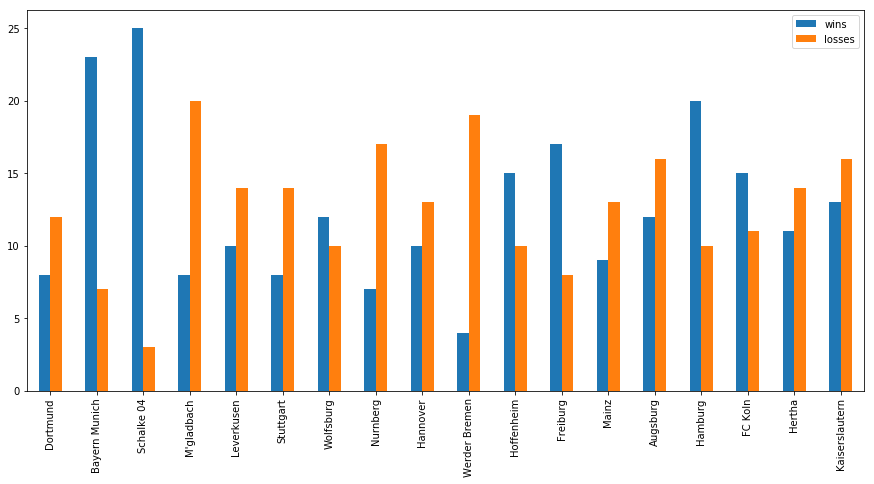

In [589]:
df.plot(kind='bar', figsize=(15, 7))

In [626]:
df1 = pd.DataFrame({'GermanyTeam': teams, 'wins': winner_2011.sort_index().values,
                   'losses': loser_2011.sort_index().values},
                  )

In [582]:
df1

,GermanyTeam,wins,losses
0,Augsburg,8,12
1,Bayern Munich,23,7
2,Dortmund,25,3
3,FC Koln,8,20
4,Freiburg,10,14
5,Hamburg,8,14
6,Hannover,12,10
7,Hertha,7,17
8,Hoffenheim,10,13
9,Kaiserslautern,4,19


In [663]:
draw_teams = draw2011.index.sort_values()
draw_teams

Index(['Augsburg', 'Bayern Munich', 'Dortmund', 'FC Koln', 'Freiburg',
       'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen',
       'M'gladbach', 'Mainz', 'Schalke 04', 'Stuttgart', 'Werder Bremen',
       'Wolfsburg'],
      dtype='object')

In [664]:
draw2011_df = pd.DataFrame({'GermanyTeam': draw_teams, 'DrawGame': draw2011},)
draw2011_df

,GermanyTeam,DrawGame
Augsburg,Augsburg,6
Bayern Munich,Bayern Munich,4
Dortmund,Dortmund,6
FC Koln,FC Koln,6
Freiburg,Freiburg,3
Hamburg,Hamburg,4
Hannover,Hannover,1
Hertha,Hertha,6
Hoffenheim,Hoffenheim,8
Leverkusen,Leverkusen,8


In [665]:
df2 = pd.merge(df1, draw2011_df, on=['GermanyTeam'], how='outer')

In [666]:
df2

,GermanyTeam,wins,losses,DrawGame
0,Augsburg,8,12,6.0
1,Bayern Munich,23,7,4.0
2,Dortmund,25,3,6.0
3,FC Koln,8,20,6.0
4,Freiburg,10,14,3.0
5,Hamburg,8,14,4.0
6,Hannover,12,10,1.0
7,Hertha,7,17,6.0
8,Hoffenheim,10,13,8.0
9,Kaiserslautern,4,19,NaN


In [479]:
team_df = pd.DataFrame({'GermanyTeam': teams})

In [481]:
print(len(team_df))
team_df

18


,GermanyTeam
0,Augsburg
1,Bayern Munich
2,Dortmund
3,FC Koln
4,Freiburg
5,Hamburg
6,Hannover
7,Hertha
8,Hoffenheim
9,Kaiserslautern


In [483]:
goals_df = season2011.groupby('Unique_Team')['count_goal'].agg('sum').sort_values(ascending=False) 
goals_df

Unique_Team
Dortmund          80
Bayern Munich     77
Schalke 04        74
Stuttgart         63
Leverkusen        52
M'gladbach        49
Werder Bremen     49
Wolfsburg         47
Mainz             47
Freiburg          45
Hannover          41
Hoffenheim        41
FC Koln           39
Hertha            38
Nurnberg          38
Augsburg          36
Hamburg           35
Kaiserslautern    24
Name: count_goal, dtype: int64

In [489]:
goals_df1 = pd.DataFrame({'# of goals': goals_df})
goals_df1

,# of goals
Unique_Team,
Dortmund,80
Bayern Munich,77
Schalke 04,74
Stuttgart,63
Leverkusen,52
M'gladbach,49
Werder Bremen,49
Wolfsburg,47
Mainz,47


In [ ]:
DataFrame.duplicated(subset=None, keep='first')

In [538]:
season2011['Match_ID'].duplicated(subset='Match_ID', keep='first')

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,WinnerInMatch,LoserInMatch,New_date
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,24,25,11,335600000,13980000,75000,0,M'gladbach,Bayern Munich,1.312675e+09
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,24,25,11,335600000,13980000,75000,1,Bayern Munich,Wolfsburg,1.313194e+09
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,24,25,11,335600000,13980000,75000,5,Bayern Munich,Hamburg,1.313798e+09
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Kaiserslautern,1.314403e+09
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,24,25,11,335600000,13980000,75000,7,Bayern Munich,Freiburg,1.315613e+09
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,24,25,11,335600000,13980000,75000,2,Bayern Munich,Schalke 04,1.316304e+09
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,24,25,11,335600000,13980000,75000,3,Bayern Munich,Leverkusen,1.316822e+09
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,24,25,11,335600000,13980000,75000,0,None,None,1.317427e+09
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,24,25,11,335600000,13980000,75000,4,Bayern Munich,Hertha,1.318637e+09
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,24,25,11,335600000,13980000,75000,1,Hannover,Bayern Munich,1.319328e+09
